In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('browser_rankings_data.csv', skiprows=1)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               3066 non-null   int64  
 1   Keyword                          3066 non-null   object 
 2   Rank                             3050 non-null   float64
 3   Country                          3066 non-null   object 
 4   Language                         3066 non-null   object 
 5   Date                             3066 non-null   object 
 6   App ID                           3066 non-null   object 
 7   Date of Last Description Change  3066 non-null   object 
 8   Short Description                3066 non-null   object 
 9   Long Description                 3066 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 239.7+ KB


In [5]:
data = pd.DataFrame(data)

In [6]:
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3050 entries, 0 to 3065
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               3050 non-null   int64  
 1   Keyword                          3050 non-null   object 
 2   Rank                             3050 non-null   float64
 3   Country                          3050 non-null   object 
 4   Language                         3050 non-null   object 
 5   Date                             3050 non-null   object 
 6   App ID                           3050 non-null   object 
 7   Date of Last Description Change  3050 non-null   object 
 8   Short Description                3050 non-null   object 
 9   Long Description                 3050 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 262.1+ KB


In [8]:
col = ['App ID', 'Short Description', 'Long Description', 'Keyword']
for i in col:
    print(i, '-', data[i].nunique())
    

App ID - 8
Short Description - 9
Long Description - 13
Keyword - 7


In [9]:
data['App ID'].nunique()

8

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()

In [12]:
col = ['App ID', 'Short Description', 'Long Description', 'Keyword']
for i in col:
    data[i] = le.fit_transform(data[i])

In [13]:
data

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description
0,1,3,2.0,in,en,16-12-2020,7,18-12-2020,8,2
1,2,3,3.0,in,en,16-12-2020,0,18-12-2020,3,1
2,3,3,4.0,in,en,16-12-2020,4,27-02-2021,2,0
3,3,3,4.0,in,en,16-12-2020,4,18-12-2020,2,3
4,4,3,1.0,in,en,16-12-2020,2,07-02-2021,6,9
...,...,...,...,...,...,...,...,...,...,...
3061,131575,1,7.0,in,en,06-03-2021,4,18-12-2020,2,3
3062,131576,1,5.0,in,en,06-03-2021,2,07-02-2021,6,9
3063,131576,1,5.0,in,en,06-03-2021,2,06-02-2021,6,8
3064,131576,1,5.0,in,en,06-03-2021,2,21-01-2021,7,6


<AxesSubplot:>

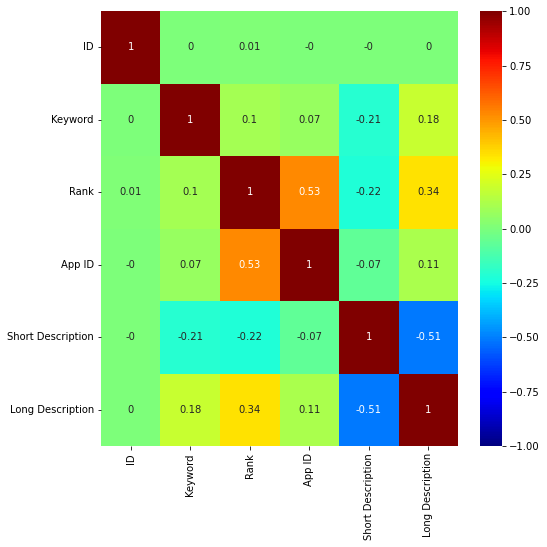

In [14]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr().round(2), vmin=-1, cmap='jet', annot=True)

In [18]:
df1 = data.groupby(['Rank', 'Keyword']).size().unstack().fillna(0)
df1

Keyword,0,1,2,3,4,5,6
Rank,,,,,,,
1.0,0.0,0.0,142.0,129.0,0.0,144.0,147.0
2.0,51.0,122.0,40.0,155.0,1.0,58.0,63.0
3.0,18.0,74.0,17.0,83.0,5.0,9.0,8.0
4.0,4.0,64.0,14.0,67.0,14.0,5.0,2.0
5.0,11.0,37.0,2.0,56.0,13.0,4.0,2.0
...,...,...,...,...,...,...,...
116.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
117.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
118.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [19]:
df2 = data.groupby(['Rank', 'App ID']).size().unstack().fillna(0)
df2

App ID,0,1,2,3,4,5,6,7
Rank,,,,,,,,
1.0,18.0,5.0,72.0,428.0,8.0,0.0,0.0,31.0
2.0,6.0,201.0,212.0,12.0,38.0,0.0,0.0,21.0
3.0,7.0,57.0,80.0,0.0,62.0,0.0,0.0,8.0
4.0,6.0,39.0,76.0,0.0,44.0,0.0,0.0,5.0
5.0,1.0,20.0,32.0,12.0,50.0,0.0,0.0,10.0
...,...,...,...,...,...,...,...,...
116.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
117.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
118.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
